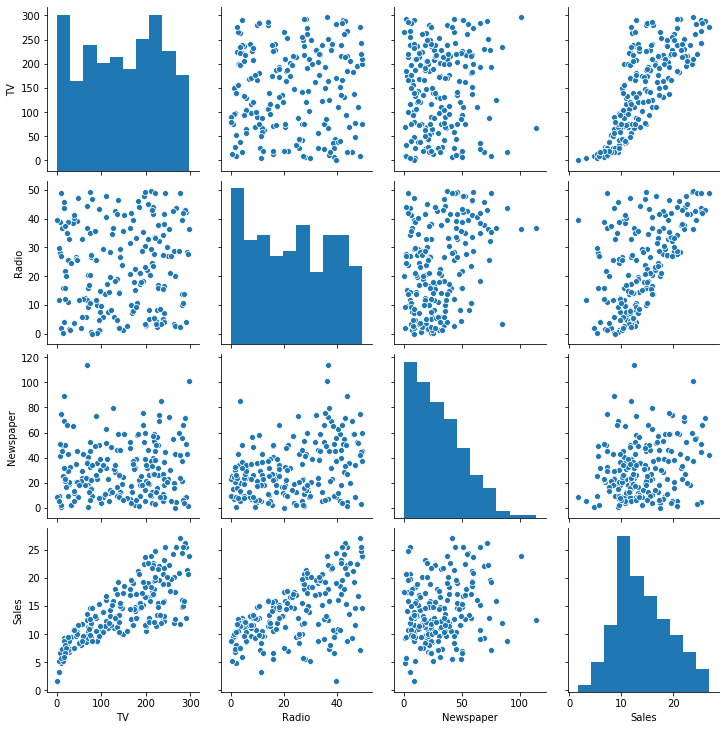

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv("Desktop/Advertising.csv")
#改变行列标签
data.rename(columns={'Unnamed: 0': 'No'}, inplace=True)
data.set_index('No', inplace=True)
sns.pairplot(data)

In [5]:
#建立机器学习线性回归模型
##我们需要做的第一件事是将我们的数据分为一个x-array（包含我们将用于进行预测y-array的数据）和一个（包含我们正在尝试进行预测的数据）。
###首先，我们应该决定要包括哪些列，你可以使用生成DataFrame列的列表，该列表raw_data.columns输出：
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
x = data[['TV', 'Radio', 'Newspaper',]]
y = data['Sales']
#将我们的数据集分为训练数据和测试数据
##scikit-learn 可以很容易地将我们的数据集分为训练数据和测试数据。为此，我们需要 train_test_split 从中的 model_selection 模块导入函数 scikit-learn。
from sklearn.model_selection import train_test_split
#如果我们想让测试数据占整个数据集的30%，可以使用以下代码：
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
#从scikit learn导入LinearRegression估计器
from sklearn.linear_model import LinearRegression
#创建一个线性回归Python对象的实例。我们将把它赋给一个名为model的变量
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[0.04459447 0.19087737 0.00099366]


In [7]:
#查看回归方程的截距：
print(model.intercept_)

2.9670641144382586


In [8]:
#查看系数的更好方法是将它们放在一个数据帧中
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
#某个特定变量上的大系数意味着该变量对试图预测的变量的值有很大的影响。同样，小值的影响也很小

Coeff
TV         0.044594
Radio      0.190877
Newspaper  0.000994

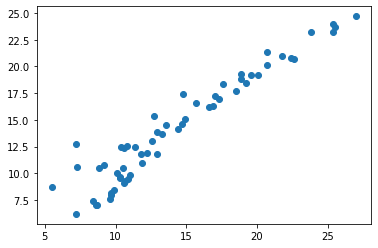

In [9]:
#根据我们的模型做出预测
##scikit-learn使得从机器学习模型做出预测变得非常容易，只需调用前面创建的模型变量的 predict 方法
### predict 变量是用来进行预测的，所以它只接受一个 x-array 参数，它将为我们生成y值
predictions = model.predict(x_test)
#预测变量保存 x_test 中存储的要素的预测值。 由于我们使用 train_test_split 方法将实际值存储在y_test中，因此我们接下来要做的是将预测数组的值与 y_test 的值进行比较。
##这里有一种简单的方法是使用散点图绘制两个数组。 使用 plt.scatter 方法可以轻松构建 matplotlib 散点图。
plt.scatter(y_test, predictions)

In [ ]:
#如图所见，我们的预测值非常接近数据集中观测值的实际值。在这个散点图中一条完美的直线表明我们的模型完美地预测了 y-array 的值

(array([ 1.,  0.,  1.,  3.,  4.,  5.,  7., 15., 14., 10.]),
 array([-5.5634642 , -4.77618894, -3.98891367, -3.20163841, -2.41436315,
        -1.62708788, -0.83981262, -0.05253735,  0.73473791,  1.52201318,
         2.30928844]),
 <a list of 10 Patch objects>)

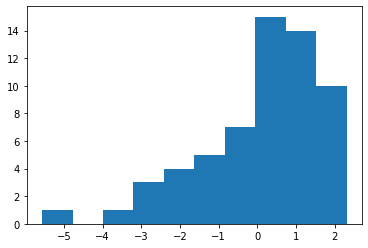

In [10]:
#另一种直观评估模型性能的方法是绘制残差，即实际y数组值与预测 y-array 值之间的差异
plt.hist(y_test - predictions)

In [ ]:
#机器学习模型中的残差如果呈正态分布是一个很好的信号！
##表明已经选择了适当的模型类型（在这种情况下为线性回归）来根据我们的数据集进行预测。

In [11]:
#测试模型的性能
##回归机器学习模型使用了三个主要性能指标：平均绝对误差/均方误差/均方根误差
###为构建的模型计算每个指标
from sklearn import metrics
#平均绝对误差（MAE）
metrics.mean_absolute_error(y_test, predictions)
#平均绝对误差能更好地反映预测值误差的实际情况.

1.1973801459946043

In [12]:
#均方误差（MSE）
metrics.mean_squared_error(y_test, predictions)
##均方误差是指参数估计值与参数真值之差平方的期望值; 
###MSE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度

2.3638288909068215

In [13]:
#均方根误差（RMSE）
#与平均绝对误差和均方误差不同，scikit learn实际上没有计算均方根误差的内置方法。由于均方根误差只是均方根误差的平方根，因此可以使用NumPy的sqrt方法轻松计算：
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.5374748423655007